# RTC System Data
## Import Libraries

In [1]:
# Upgrade command
!pip install --upgrade pip

# Install Requests
!pip install requests

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1.1)


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import json
import requests
import datetime
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from collections import namedtuple
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib.pyplot import figure

### Latitude, Longitude & TZ

In [3]:
# Specify Location (Albuquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

## Accessing API with Pandas
### Weather and System Data

In [4]:
# Get Weather Data from URL - June 19
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/weather/start/2020-06-19/end/2020-06-20/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
weather_df = pd.DataFrame(response.json())
weather_df.head()

,AmbientTemp,DiffuseIrrad,DirectIrrad,GlobalIrrad,RainDailyAccumilation,RelativeHumidity,TmStamp,WindDirection,WindSpeed
0,24.809999,-10.607711,0.346373,-6.849933,0.0,8.55,1592524860000,161.800003,4.799
1,24.730000,-10.777307,0.287408,-6.837613,0.0,8.59,1592524920000,160.399994,4.138
2,24.639999,-10.579144,0.353234,-6.848300,0.0,8.77,1592524980000,161.199997,3.947
3,24.580000,-10.396239,0.430556,-6.846753,0.0,8.64,1592525040000,158.699997,4.501
4,24.500000,-10.512667,0.319354,-6.800778,0.0,8.85,1592525100000,161.000000,4.051


In [5]:
# Drop unnecessary data
weather_df.drop(['RainDailyAccumilation', 'RelativeHumidity', 'WindDirection', 'WindSpeed'], axis=1, inplace=True)

weather_df.head()

,AmbientTemp,DiffuseIrrad,DirectIrrad,GlobalIrrad,TmStamp
0,24.809999,-10.607711,0.346373,-6.849933,1592524860000
1,24.730000,-10.777307,0.287408,-6.837613,1592524920000
2,24.639999,-10.579144,0.353234,-6.848300,1592524980000
3,24.580000,-10.396239,0.430556,-6.846753,1592525040000
4,24.500000,-10.512667,0.319354,-6.800778,1592525100000


In [6]:
weather_df.rename(columns={'TmStamp':'TimeStamp', 'GlobalIrrad':'GHI', 'DirectIrrad':'DNI', 'DiffuseIrrad':'DHI'}, inplace=True)

In [7]:
weather_df.head()

,AmbientTemp,DHI,DNI,GHI,TimeStamp
0,24.809999,-10.607711,0.346373,-6.849933,1592524860000
1,24.730000,-10.777307,0.287408,-6.837613,1592524920000
2,24.639999,-10.579144,0.353234,-6.848300,1592524980000
3,24.580000,-10.396239,0.430556,-6.846753,1592525040000
4,24.500000,-10.512667,0.319354,-6.800778,1592525100000


In [8]:
# Examine the types of the column labels
all(isinstance(column, str) for column in weather_df.columns)

True

In [9]:
weather_df['TimeStamp'] =  pd.to_datetime(weather_df['TimeStamp']/1000, unit='s')
weather_df.head()

,AmbientTemp,DHI,DNI,GHI,TimeStamp
0,24.809999,-10.607711,0.346373,-6.849933,2020-06-19 00:01:00
1,24.730000,-10.777307,0.287408,-6.837613,2020-06-19 00:02:00
2,24.639999,-10.579144,0.353234,-6.848300,2020-06-19 00:03:00
3,24.580000,-10.396239,0.430556,-6.846753,2020-06-19 00:04:00
4,24.500000,-10.512667,0.319354,-6.800778,2020-06-19 00:05:00


In [10]:
# TimeStamp as Index
weather_df.set_index('TimeStamp', inplace=True)
weather_df.head()

,AmbientTemp,DHI,DNI,GHI
TimeStamp,,,,
2020-06-19 00:01:00,24.809999,-10.607711,0.346373,-6.849933
2020-06-19 00:02:00,24.730000,-10.777307,0.287408,-6.837613
2020-06-19 00:03:00,24.639999,-10.579144,0.353234,-6.848300
2020-06-19 00:04:00,24.580000,-10.396239,0.430556,-6.846753
2020-06-19 00:05:00,24.500000,-10.512667,0.319354,-6.800778


In [11]:
# Weather Keys
print("Keys of weather_df: \n{}".format(weather_df.keys()))

Keys of weather_df: 
Index(['AmbientTemp', 'DHI', 'DNI', 'GHI'], dtype='object')


In [12]:
# Analyzing Data - June 19
# Global Horizonal & Direct Normal(W/m*2)
# Air Temperature (deg C)
weather_df.describe()

,AmbientTemp,DHI,DNI,GHI
count,1439.000000,1439.000000,1439.000000,1439.000000
mean,27.012307,67.693761,422.796887,355.707307
std,4.572493,109.746200,391.003499,398.106702
min,18.889999,-12.065524,-0.395563,-7.773180
25%,23.105000,-8.005111,0.267170,-6.483035
50%,27.010000,55.007885,495.630737,164.990936
75%,31.345000,123.886211,825.404724,752.182770
max,34.660000,922.826904,959.356262,1067.953003


In [13]:
weather_df_slice = weather_df.iloc[::5] 

## System

In [14]:
# Get System Data from URL - June 19
URL = "https://pv-dashboard.sandia.gov/api/v1.0/location/Albuquerque/data/system/start/2020-06-19/end/2020-06-20/key/ZhWJxS48oMpRm1"

response = requests.get(url=URL)
system_df = pd.DataFrame(response.json())
system_df.head()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TmStamp
0,23.691666,-4.634994,0.0,0.0,-0.04500,2.450000,-2.569542,0.006,1.65,0.0,1592524860000
1,23.608332,-4.634994,0.0,0.0,-0.04500,2.316667,-2.349249,0.006,1.60,0.0,1592524920000
2,23.558332,-4.634994,0.0,0.0,-0.04500,2.200000,-2.569503,0.006,1.60,0.0,1592524980000
3,23.549997,-4.634994,0.0,0.0,-0.04475,2.283333,-2.202193,0.006,1.60,0.0,1592525040000
4,23.508331,-4.538432,0.0,0.0,-0.04475,2.250000,-2.495945,0.006,1.60,0.0,1592525100000


In [15]:
# System Keys
print("Keys of system_df: \n{}".format(system_df.keys()))

Keys of system_df: 
Index(['AmbientTemp', 'PyranometerIrrad', 'RefCell1Irrad', 'RefCell2Irrad',
       'Sys1Idc', 'Sys1Vdc', 'Sys1Wac', 'Sys2Idc', 'Sys2Vdc', 'Sys2Wac',
       'TmStamp'],
      dtype='object')


In [16]:
system_df.rename(columns={'TmStamp':'TimeStamp'}, inplace=True)

In [17]:
system_df.head()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TimeStamp
0,23.691666,-4.634994,0.0,0.0,-0.04500,2.450000,-2.569542,0.006,1.65,0.0,1592524860000
1,23.608332,-4.634994,0.0,0.0,-0.04500,2.316667,-2.349249,0.006,1.60,0.0,1592524920000
2,23.558332,-4.634994,0.0,0.0,-0.04500,2.200000,-2.569503,0.006,1.60,0.0,1592524980000
3,23.549997,-4.634994,0.0,0.0,-0.04475,2.283333,-2.202193,0.006,1.60,0.0,1592525040000
4,23.508331,-4.538432,0.0,0.0,-0.04475,2.250000,-2.495945,0.006,1.60,0.0,1592525100000


In [18]:
system_df.tail()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TimeStamp
1434,21.416664,-2.896871,0.0,0.0,-0.045,2.2,-2.496633,0.006,1.766667,0.0,1592610900000
1435,21.325001,-3.379683,0.0,0.0,-0.045,2.2,-2.350006,0.006,1.716667,0.0,1592610960000
1436,21.300001,-3.476246,0.0,0.0,-0.045,2.2,-2.423650,0.006,1.650000,0.0,1592611020000
1437,21.291666,-3.476246,0.0,0.0,-0.045,2.2,-2.496851,0.006,1.683333,0.0,1592611080000
1438,21.416666,-3.283121,0.0,0.0,-0.045,2.2,-2.202895,0.006,1.666667,0.0,1592611140000


In [19]:
# Examine the types of the column labels
all(isinstance(column, str) for column in system_df.columns)

True

In [20]:
system_df['TimeStamp'] =  pd.to_datetime(system_df['TimeStamp']/1000, unit='s')
system_df.head()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac,TimeStamp
0,23.691666,-4.634994,0.0,0.0,-0.04500,2.450000,-2.569542,0.006,1.65,0.0,2020-06-19 00:01:00
1,23.608332,-4.634994,0.0,0.0,-0.04500,2.316667,-2.349249,0.006,1.60,0.0,2020-06-19 00:02:00
2,23.558332,-4.634994,0.0,0.0,-0.04500,2.200000,-2.569503,0.006,1.60,0.0,2020-06-19 00:03:00
3,23.549997,-4.634994,0.0,0.0,-0.04475,2.283333,-2.202193,0.006,1.60,0.0,2020-06-19 00:04:00
4,23.508331,-4.538432,0.0,0.0,-0.04475,2.250000,-2.495945,0.006,1.60,0.0,2020-06-19 00:05:00


In [21]:
system_df.drop(system_df.index[range(0, 360)], axis=0, inplace=True)

In [22]:
system_df.drop(system_df.index[range(1019, 1079)], axis=0, inplace=True)

In [23]:
# TimeStamp as Index
system_df.set_index('TimeStamp', inplace=True)
system_df.head()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac
TimeStamp,,,,,,,,,,
2020-06-19 06:01:00,20.183332,55.716492,53.702084,51.967747,0.38500,350.316650,120.680840,0.42325,362.816650,126.091125
2020-06-19 06:02:00,20.200001,56.778671,54.340321,52.597378,0.38775,352.333344,122.990425,0.42475,364.649994,132.069000
2020-06-19 06:03:00,20.191668,56.778671,54.978588,53.182999,0.39075,354.449982,125.186371,0.43225,363.716675,133.471619
2020-06-19 06:04:00,20.241667,56.006176,55.571121,53.783527,0.39425,355.500000,126.778221,0.43475,364.649994,135.709976
2020-06-19 06:05:00,20.275000,55.523365,56.194225,54.398666,0.39725,357.116669,128.146805,0.44000,364.783325,137.076599


In [24]:
# Analyzing Data
system_df.describe()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,28.379816,436.161341,419.646893,417.723839,3.426025,266.988185,1066.372220,3.453173,266.297313,1093.487175
std,3.576951,375.225502,369.221083,369.216666,3.040900,130.608404,923.135293,3.017453,135.131334,937.483135
min,20.183332,-5.117805,0.000000,0.000000,-0.045000,2.200000,-2.863817,0.006000,1.533333,0.000000
25%,25.379166,25.395905,28.851056,28.426190,0.191125,310.633331,40.487894,0.218125,315.633331,50.537029
50%,29.316666,412.610992,380.722412,375.889984,3.136000,320.466644,1047.666382,3.148250,323.649994,1076.076050
75%,31.458334,833.284973,812.541260,814.278687,6.671125,340.399994,2051.914978,6.649750,345.341660,2094.192139
max,33.591667,1009.269959,984.457581,983.184265,8.090750,403.733307,2433.621338,8.082500,369.783325,2487.917725


In [25]:
system_df_slice = system_df.iloc[::5] 

In [26]:
system_df_slice.head()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac
TimeStamp,,,,,,,,,,
2020-06-19 06:01:00,20.183332,55.716492,53.702084,51.967747,0.38500,350.316650,120.680840,0.42325,362.816650,126.091125
2020-06-19 06:06:00,20.325001,55.040554,56.907307,55.071331,0.40200,357.983307,130.151443,0.44825,363.833344,139.612564
2020-06-19 06:11:00,20.700001,57.744297,60.403996,58.153500,0.45100,349.649994,142.366714,0.48425,363.766632,152.689529
2020-06-19 06:16:00,21.208334,65.662415,66.741379,63.075367,0.49775,347.750000,157.074142,0.53900,361.849976,171.211258
2020-06-19 06:21:00,21.283335,87.195824,69.254578,67.968338,0.53300,357.083344,173.863098,0.59675,363.933319,193.661636


In [27]:
system_df_slice.describe()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,28.362213,435.817702,419.379032,417.336309,3.422059,267.537658,1065.684743,3.452426,266.701955,1092.675034
std,3.595059,375.775988,369.806831,369.898789,3.044145,130.623527,924.688671,3.023742,134.877077,939.009677
min,20.183332,-5.117805,0.000000,0.000000,-0.045000,2.200000,-2.790262,0.006000,1.566667,0.000000
25%,25.327084,26.940903,30.132668,29.679338,0.201625,311.387505,44.669544,0.231625,315.224998,54.153587
50%,29.291667,411.741959,380.075500,375.675613,3.124375,321.508331,1053.204956,3.129625,324.616669,1081.464539
75%,31.583334,825.028931,811.404037,805.854431,6.687625,340.575012,2051.461151,6.624687,344.004150,2094.943726
max,33.491665,999.613708,976.283020,975.784485,8.021000,402.233307,2406.228760,7.972500,368.966644,2454.388428


# Weather and System Plot
## Weather June 19

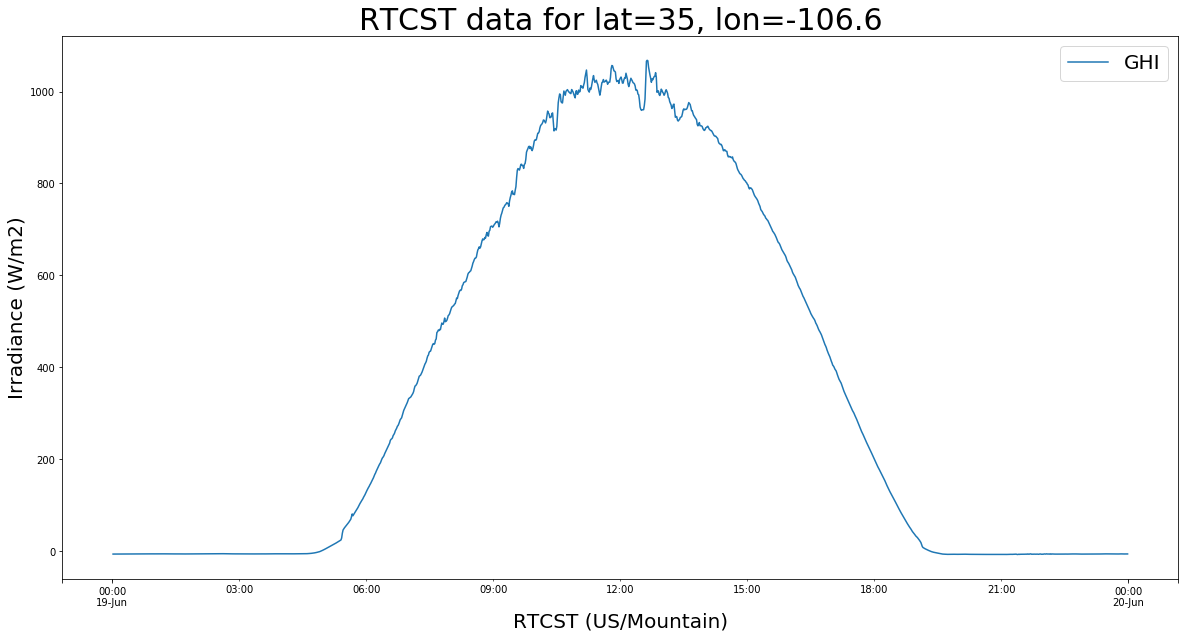

In [28]:
# Plot GHI
irrad_var = ['GHI']
weather_df[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

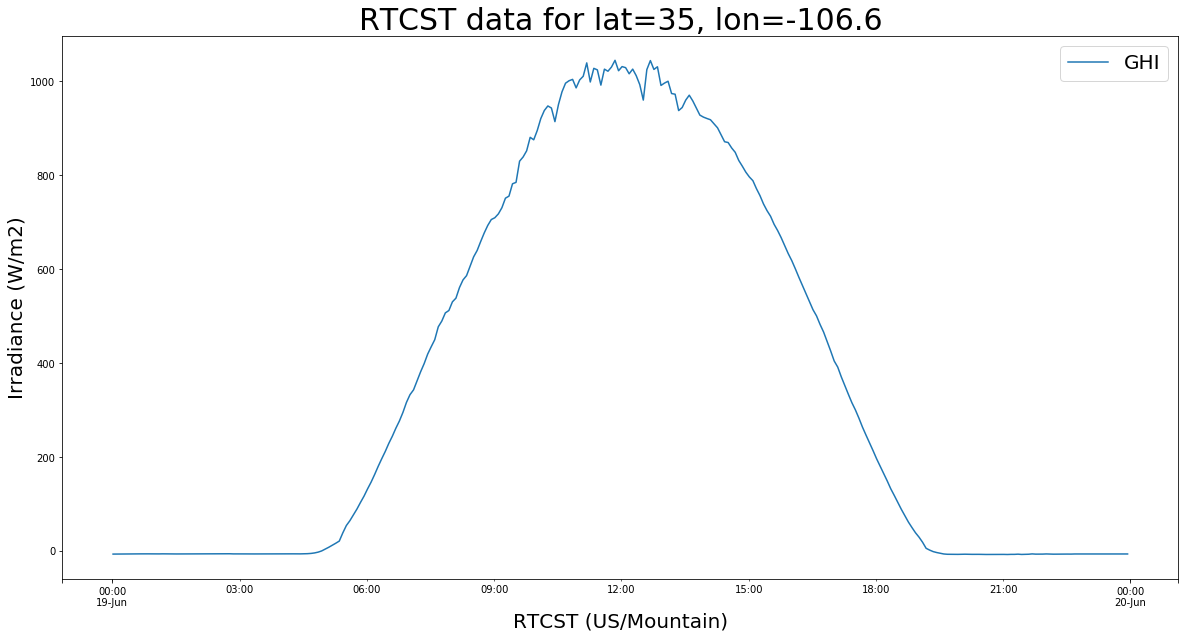

In [29]:
# Plot GHI
irrad_var = ['GHI']
weather_df_slice[irrad_var].plot(figsize=(20,10));
plt.ylabel('Irradiance (W/m2)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

## System PIV June 19

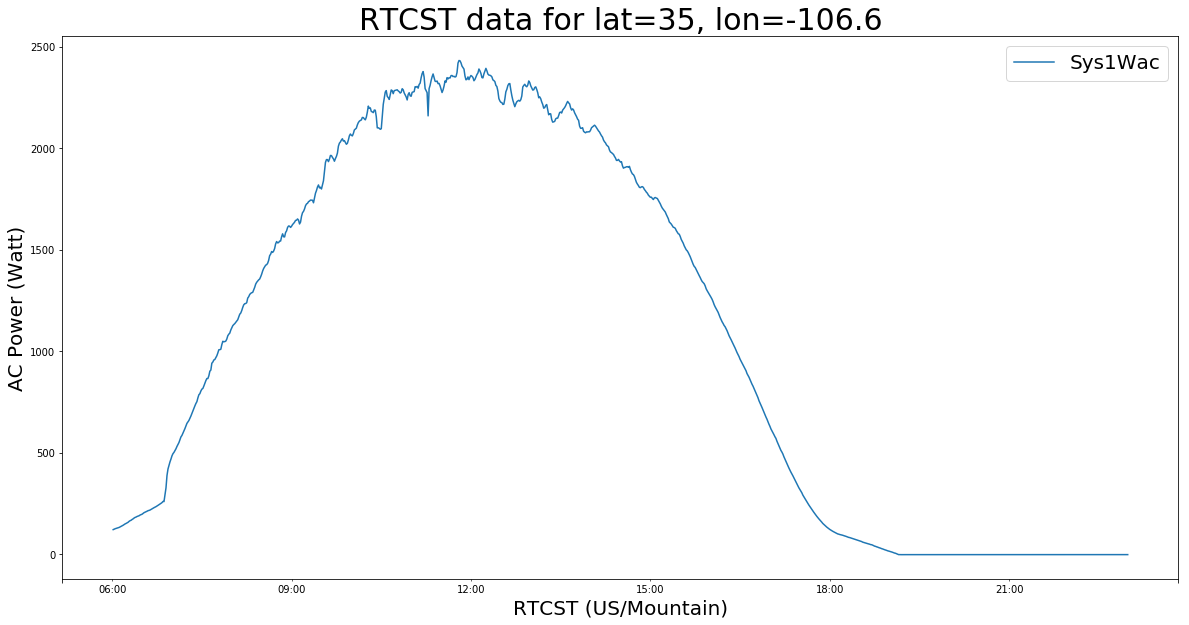

In [30]:
# Plot AC Power Output
sys1i_var = ['Sys1Wac']
system_df[sys1i_var].plot(figsize=(20,10));
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

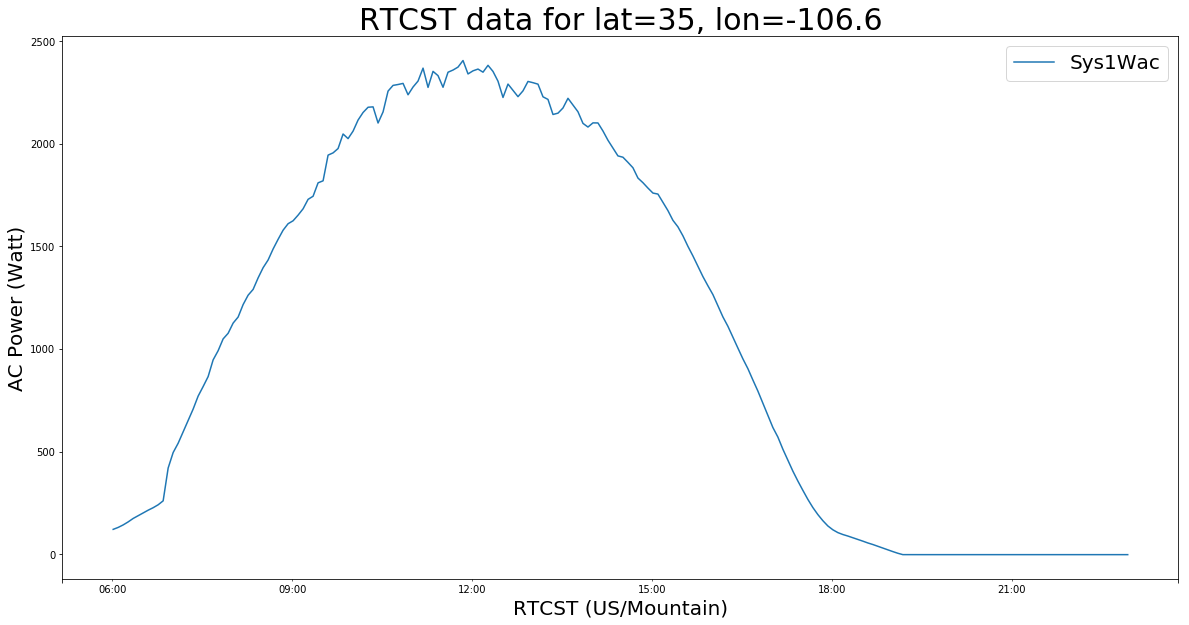

In [31]:
# Plot AC Power Output
sys1i_var = ['Sys1Wac']
system_df_slice[sys1i_var].plot(figsize=(20,10));
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

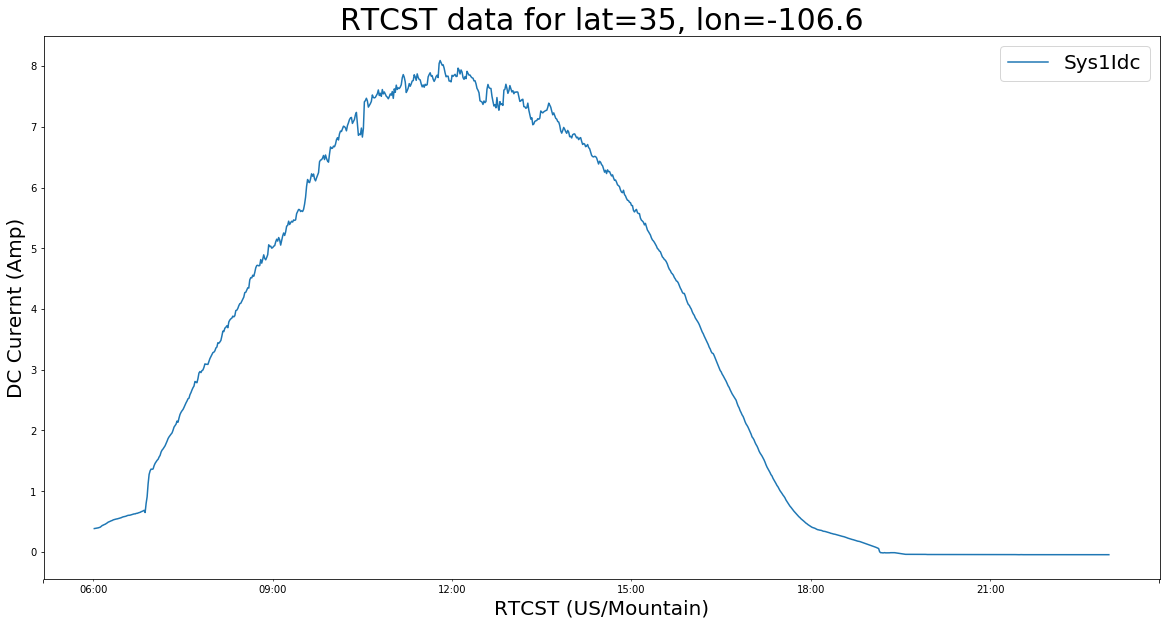

In [32]:
# Plot DC Current
sys1i_var = ['Sys1Idc']
system_df[sys1i_var].plot(figsize=(20,10));
plt.ylabel('DC Curernt (Amp)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

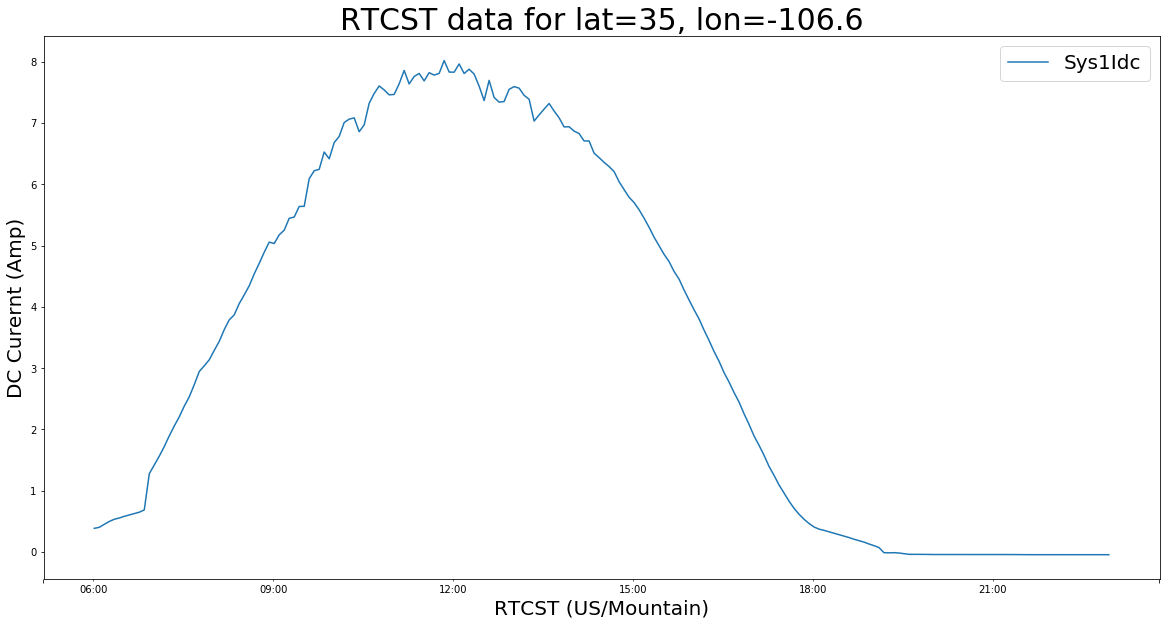

In [33]:
# Plot DC Current
sys1i_var = ['Sys1Idc']
system_df_slice[sys1i_var].plot(figsize=(20,10));
plt.ylabel('DC Curernt (Amp)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

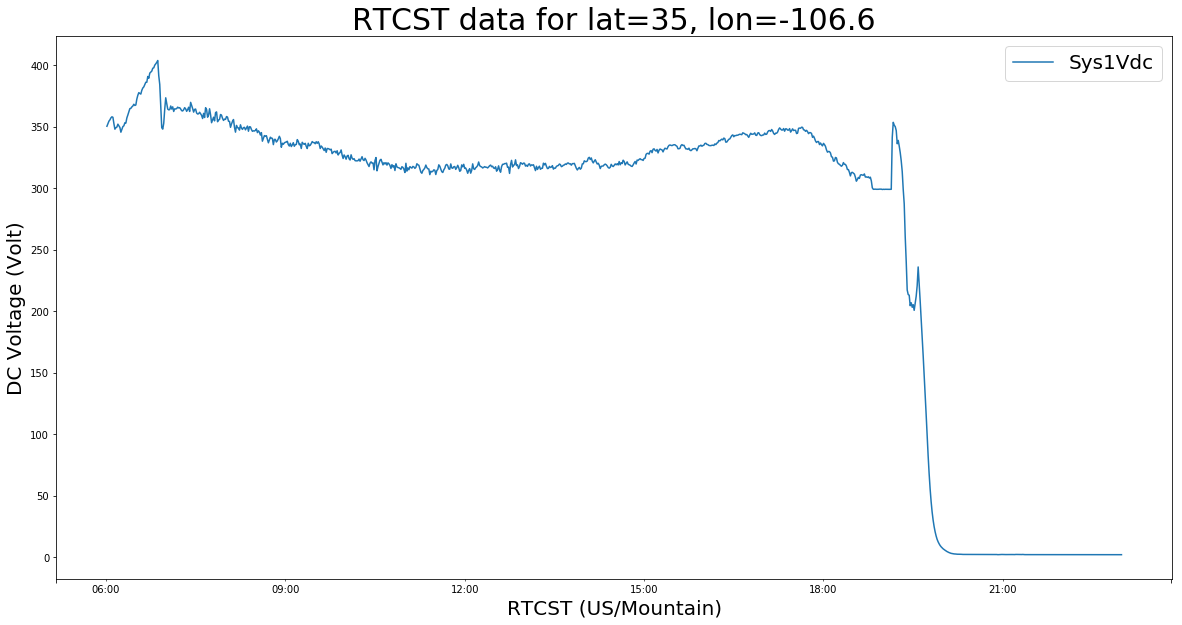

In [34]:
# Plot DC Voltage
sys1v_var = ['Sys1Vdc']
system_df[sys1v_var].plot(figsize=(20,10));
plt.ylabel('DC Voltage (Volt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

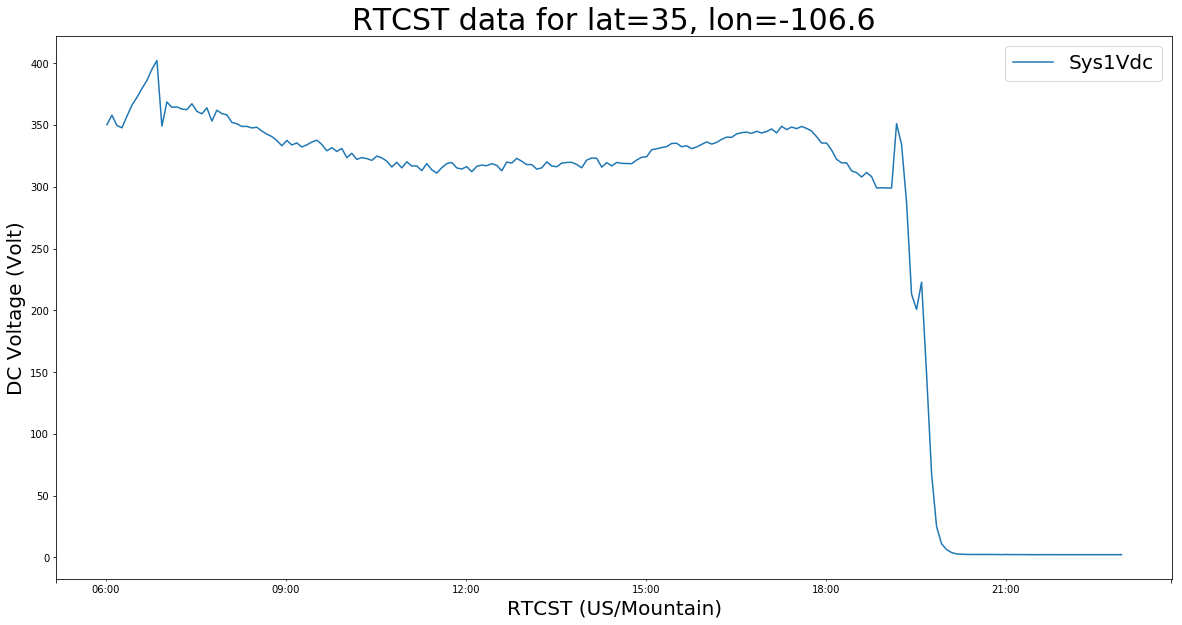

In [35]:
# Plot DC Voltage
sys1v_var = ['Sys1Vdc']
system_df_slice[sys1v_var].plot(figsize=(20,10));
plt.ylabel('DC Voltage (Volt)',size=20);
plt.xlabel('RTCST ({})'.format(tz),size=20);
plt.title('RTCST data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

## Read CSV's

In [36]:
# Read HRRR Irradiance CSV
hrrr_df = pd.read_csv('HRRR June 19.csv')
print("Keys of hrrr_df: \n{}".format(hrrr_df.keys()))

Keys of hrrr_df: 
Index(['Unnamed: 0', 'ghi', 'dni', 'dhi'], dtype='object')


In [37]:
hrrr_df.describe()

,ghi,dni,dhi
count,18.000000,18.000000,18.000000
mean,451.249179,459.302270,121.896104
std,382.034749,319.130610,100.319422
min,0.000000,0.000000,0.000000
25%,37.910394,66.016136,24.562175
50%,450.014640,659.968739,107.878450
75%,819.324251,712.349287,207.168273
max,973.056512,729.259694,281.904457


In [38]:
hrrr_df.head()

,Unnamed: 0,ghi,dni,dhi
0,2020-06-19 06:00:00-06:00,0.402484,0.000000,0.402484
1,2020-06-19 07:00:00-06:00,118.664932,264.064546,65.272057
2,2020-06-19 08:00:00-06:00,321.198158,567.056508,95.809459
3,2020-06-19 09:00:00-06:00,523.946401,698.891855,117.747131
4,2020-06-19 10:00:00-06:00,703.201820,728.314404,163.609078


In [39]:
# Read Forecast AC Power CSV
ac_df = pd.read_csv('AC June 19.csv')
print("Keys of ac_df: \n{}".format(ac_df.keys()))

Keys of ac_df: 
Index(['2020-06-19 06:00:00-06:00', '-1.56'], dtype='object')


In [40]:
ac_df.head()

,2020-06-19 06:00:00-06:00,-1.56
0,2020-06-19 06:05:00-06:00,-1.560000
1,2020-06-19 06:10:00-06:00,-1.560000
2,2020-06-19 06:15:00-06:00,-1.560000
3,2020-06-19 06:20:00-06:00,19.209321
4,2020-06-19 06:25:00-06:00,82.648812


In [41]:
# TimeStamp as Index
ac_df.set_index('2020-06-19 06:00:00-06:00', inplace=True)
ac_df.head()

,-1.56
2020-06-19 06:00:00-06:00,
2020-06-19 06:05:00-06:00,-1.560000
2020-06-19 06:10:00-06:00,-1.560000
2020-06-19 06:15:00-06:00,-1.560000
2020-06-19 06:20:00-06:00,19.209321
2020-06-19 06:25:00-06:00,82.648812


In [42]:
ac_df.rename(columns={'-1.56':'AC Power'}, inplace=True)
ac_df.head()

,AC Power
2020-06-19 06:00:00-06:00,
2020-06-19 06:05:00-06:00,-1.560000
2020-06-19 06:10:00-06:00,-1.560000
2020-06-19 06:15:00-06:00,-1.560000
2020-06-19 06:20:00-06:00,19.209321
2020-06-19 06:25:00-06:00,82.648812


In [43]:
ac_df.describe()

,AC Power
count,204.000000
mean,1747.902882
std,1101.266821
min,-1.560000
25%,425.940514
50%,2381.446741
75%,2648.689626
max,2741.854162


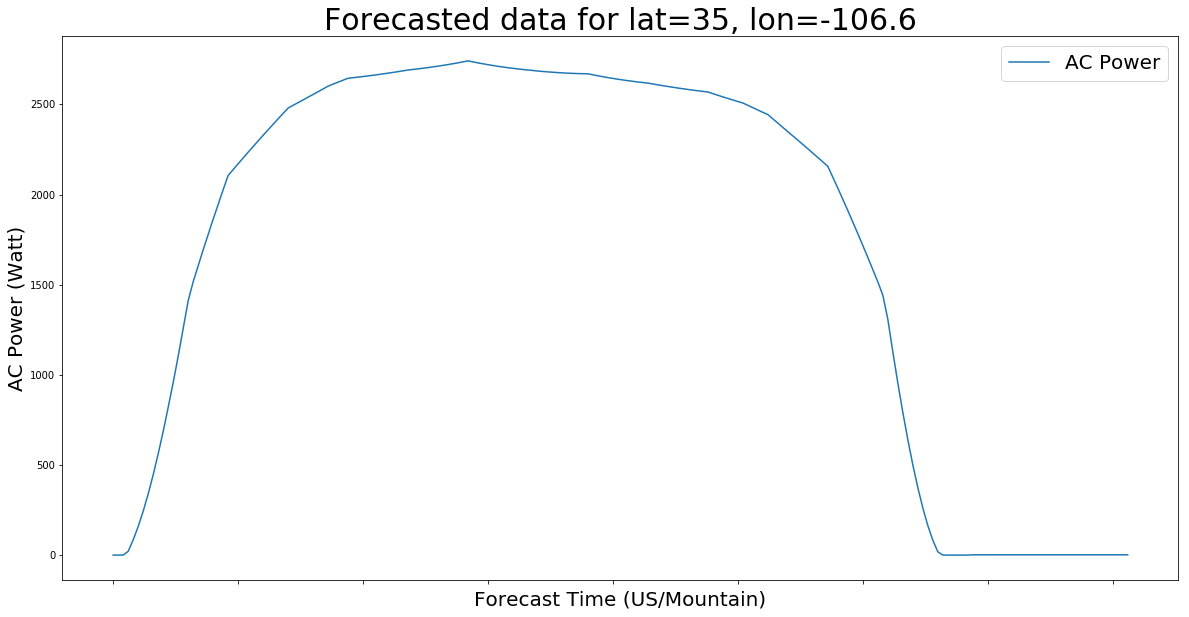

In [44]:
# Plot AC Power
forecast_ac = ['AC Power']
ac_df[forecast_ac].plot(figsize=(20,10), label = 'AC Power');
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('Forecast Time ({})'.format(tz),size=20);
plt.title('Forecasted data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

In [45]:
# Read Forecast DC Power CSV
dc_df = pd.read_csv('DC June 19.csv')
print("Keys of dc_df: \n{}".format(dc_df.keys()))

Keys of dc_df: 
Index(['Unnamed: 0', 'i_sc', 'i_mp', 'v_oc', 'v_mp', 'p_mp', 'i_x', 'i_xx'], dtype='object')


In [46]:
dc_df.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,3.194471,2.845002,655.438265,520.041431,1844.425080,3.120731,2.041874
std,2.005512,1.783179,315.060194,254.680659,1156.291325,1.959889,1.263603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.835302,0.752407,777.283867,628.773093,464.547680,0.813981,0.591032
50%,4.380423,3.898550,804.402622,640.672139,2504.360446,4.279082,2.806200
75%,4.851133,4.315351,822.208324,657.231985,2791.446714,4.740488,3.063320
max,4.904678,4.362644,831.703201,683.927607,2890.610154,4.792977,3.092515


In [47]:
dc_df.head()

,Unnamed: 0,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
0,2020-06-19 06:00:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-06-19 06:05:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-06-19 06:10:00-06:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-06-19 06:15:00-06:00,0.101729,0.092080,704.590225,484.885775,44.648102,0.099082,0.073400
4,2020-06-19 06:20:00-06:00,0.205133,0.185612,738.979123,558.719403,103.705003,0.199809,0.147602


### Merge DataFrames

In [48]:
# Clear Index
ac_df=ac_df.reset_index()
system_df_slice=system_df_slice.reset_index()

In [49]:
ac_df.head()

,2020-06-19 06:00:00-06:00,AC Power
0,2020-06-19 06:05:00-06:00,-1.560000
1,2020-06-19 06:10:00-06:00,-1.560000
2,2020-06-19 06:15:00-06:00,-1.560000
3,2020-06-19 06:20:00-06:00,19.209321
4,2020-06-19 06:25:00-06:00,82.648812


In [50]:
ac_df.describe()

,AC Power
count,204.000000
mean,1747.902882
std,1101.266821
min,-1.560000
25%,425.940514
50%,2381.446741
75%,2648.689626
max,2741.854162


In [51]:
system_df_slice.head()

,TimeStamp,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac
0,2020-06-19 06:01:00,20.183332,55.716492,53.702084,51.967747,0.38500,350.316650,120.680840,0.42325,362.816650,126.091125
1,2020-06-19 06:06:00,20.325001,55.040554,56.907307,55.071331,0.40200,357.983307,130.151443,0.44825,363.833344,139.612564
2,2020-06-19 06:11:00,20.700001,57.744297,60.403996,58.153500,0.45100,349.649994,142.366714,0.48425,363.766632,152.689529
3,2020-06-19 06:16:00,21.208334,65.662415,66.741379,63.075367,0.49775,347.750000,157.074142,0.53900,361.849976,171.211258
4,2020-06-19 06:21:00,21.283335,87.195824,69.254578,67.968338,0.53300,357.083344,173.863098,0.59675,363.933319,193.661636


In [52]:
system_df_slice.describe()

,AmbientTemp,PyranometerIrrad,RefCell1Irrad,RefCell2Irrad,Sys1Idc,Sys1Vdc,Sys1Wac,Sys2Idc,Sys2Vdc,Sys2Wac
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,28.362213,435.817702,419.379032,417.336309,3.422059,267.537658,1065.684743,3.452426,266.701955,1092.675034
std,3.595059,375.775988,369.806831,369.898789,3.044145,130.623527,924.688671,3.023742,134.877077,939.009677
min,20.183332,-5.117805,0.000000,0.000000,-0.045000,2.200000,-2.790262,0.006000,1.566667,0.000000
25%,25.327084,26.940903,30.132668,29.679338,0.201625,311.387505,44.669544,0.231625,315.224998,54.153587
50%,29.291667,411.741959,380.075500,375.675613,3.124375,321.508331,1053.204956,3.129625,324.616669,1081.464539
75%,31.583334,825.028931,811.404037,805.854431,6.687625,340.575012,2051.461151,6.624687,344.004150,2094.943726
max,33.491665,999.613708,976.283020,975.784485,8.021000,402.233307,2406.228760,7.972500,368.966644,2454.388428


In [53]:
# I guess it will make plotting easier
system=system_df_slice['Sys1Wac']
ac_df['System']=system
ac_df.head()

,2020-06-19 06:00:00-06:00,AC Power,System
0,2020-06-19 06:05:00-06:00,-1.560000,120.680840
1,2020-06-19 06:10:00-06:00,-1.560000,130.151443
2,2020-06-19 06:15:00-06:00,-1.560000,142.366714
3,2020-06-19 06:20:00-06:00,19.209321,157.074142
4,2020-06-19 06:25:00-06:00,82.648812,173.863098


In [54]:
# TimeStamp as Index
ac_df.set_index('2020-06-19 06:00:00-06:00', inplace=True)
ac_df.head()

,AC Power,System
2020-06-19 06:00:00-06:00,,
2020-06-19 06:05:00-06:00,-1.560000,120.680840
2020-06-19 06:10:00-06:00,-1.560000,130.151443
2020-06-19 06:15:00-06:00,-1.560000,142.366714
2020-06-19 06:20:00-06:00,19.209321,157.074142
2020-06-19 06:25:00-06:00,82.648812,173.863098


In [55]:
# Examine the column labels
all(isinstance(column, str) for column in ac_df.columns)

True

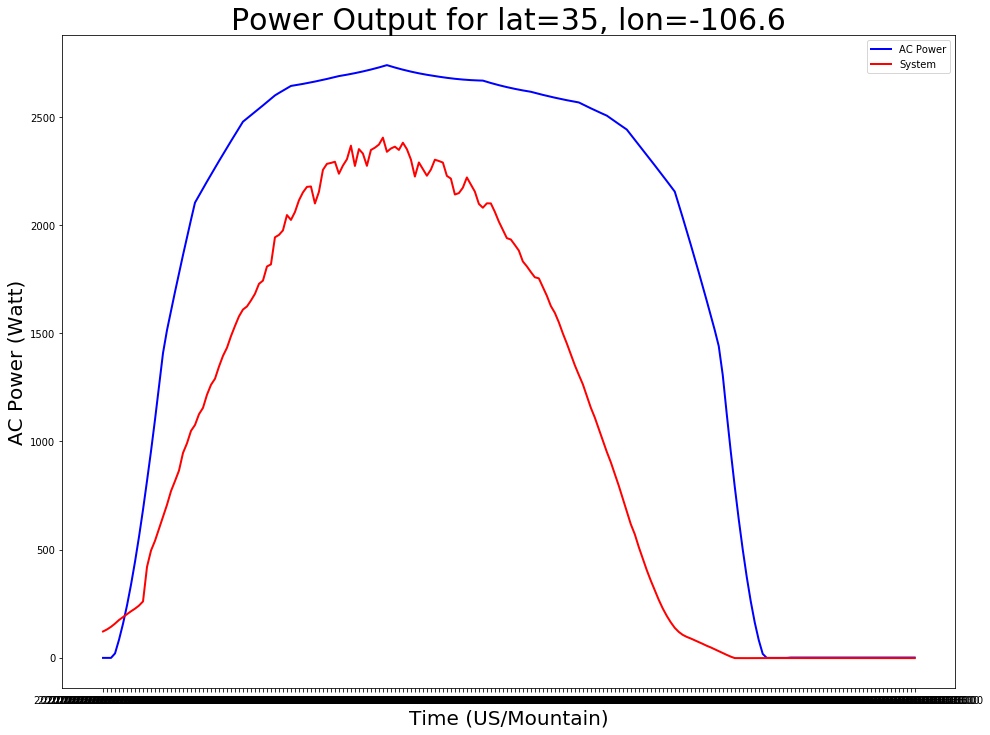

In [56]:
plt.figure(figsize=(16,12))
plt.ylabel('AC Power (Watt)',size=20);
plt.xlabel('Time ({})'.format(tz),size=20);
plt.title('Power Output for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.plot('AC Power', data=ac_df, marker='', color='blue', linewidth=2);
plt.plot('System', data=ac_df, marker='', color='red', linewidth=2);
plt.legend();

## Error
### Mean Square Error

In [57]:
y_true= system_df_slice['Sys1Wac']
y_pred= ac_df['AC Power']
print('Mean Square Error:\n',mean_squared_error(y_true, y_pred))

Mean Square Error:
 812136.5229735574


In [58]:
system_df.drop(system_df.index[range(0, 350)], axis=0, inplace=True)